In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tabulate

In [9]:
eu = pd.read_csv('data/eu.csv', index_col=0, parse_dates=True, skipinitialspace=True)
eu.drop('date', axis='columns', inplace=True)
eu.head().to_markdown

<bound method DataFrame.to_markdown of               open    high     low   close  volume
1971-01-04  0.5369  0.5369  0.5369  0.5369       1
1971-01-05  0.5366  0.5366  0.5366  0.5366       1
1971-01-06  0.5365  0.5365  0.5365  0.5365       1
1971-01-07  0.5368  0.5368  0.5368  0.5368       1
1971-01-08  0.5371  0.5371  0.5371  0.5371       1>

In [8]:
eu.tail()

<bound method DataFrame.to_markdown of                open     high      low    close  volume
2019-05-01  1.12148  1.12644  1.11867  1.11941   52561
2019-05-02  1.11942  1.12187  1.11703  1.11709   59203
2019-05-03  1.11710  1.13236  1.11346  1.13234   62828
2019-05-08  1.11922  1.11927  1.11892  1.11920     698
2019-05-09  1.11902  1.11985  1.11860  1.11903   12844>

In [10]:
eu.shape, 

((12115, 5),)

In [ ]:
eu.isna().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [14]:
eu.describe()

<bound method DataFrame.to_markdown of                open          high           low         close         volume
count  12115.000000  12115.000000  12115.000000  12115.000000   12115.000000
mean       1.072829      1.076753      1.068981      1.072871   20323.133884
std        0.234412      0.236481      0.232351      0.234409   37538.102171
min        0.536500      0.536500      0.536500      0.536500       1.000000
25%        0.878950      0.881650      0.875400      0.878700     231.000000
50%        1.110700      1.115000      1.107070      1.111100    1891.000000
75%        1.257600      1.263790      1.251900      1.257600   11863.000000
max        1.599500      1.603800      1.586600      1.599700  308716.000000>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


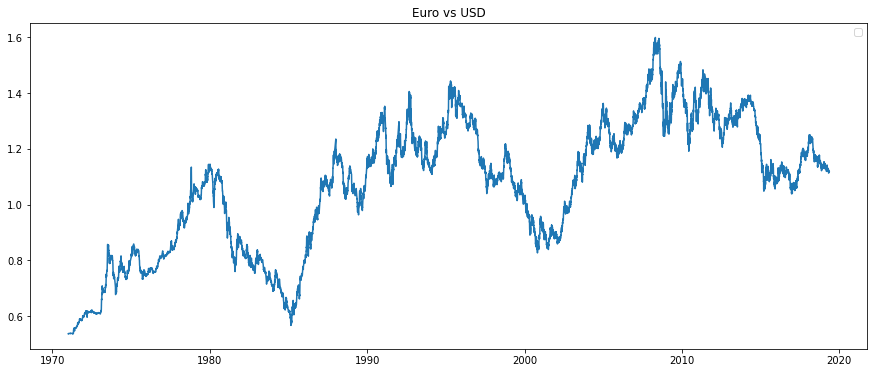

In [17]:
plt.figure(figsize=(15,6))
plt.plot(eu.open)
plt.title('Euro vs USD')
plt.legend()
plt.show()

No handles with labels found to put in legend.


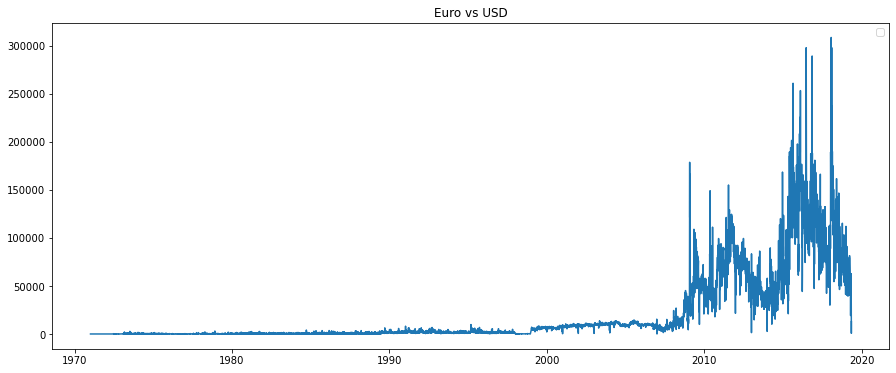

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(eu.volume)
plt.title('Euro vs USD')
plt.legend()
plt.show()

<AxesSubplot:>

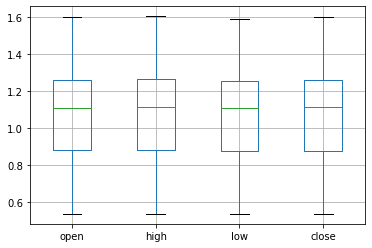

In [ ]:
#box plot for open, high, low , close
eu.drop('volume', axis=1).boxplot()

<AxesSubplot:>

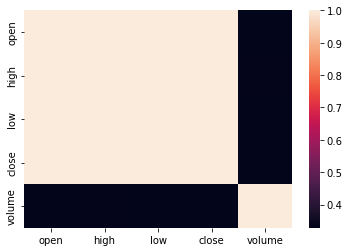

In [ ]:
sns.heatmap(eu.corr())

<AxesSubplot:>

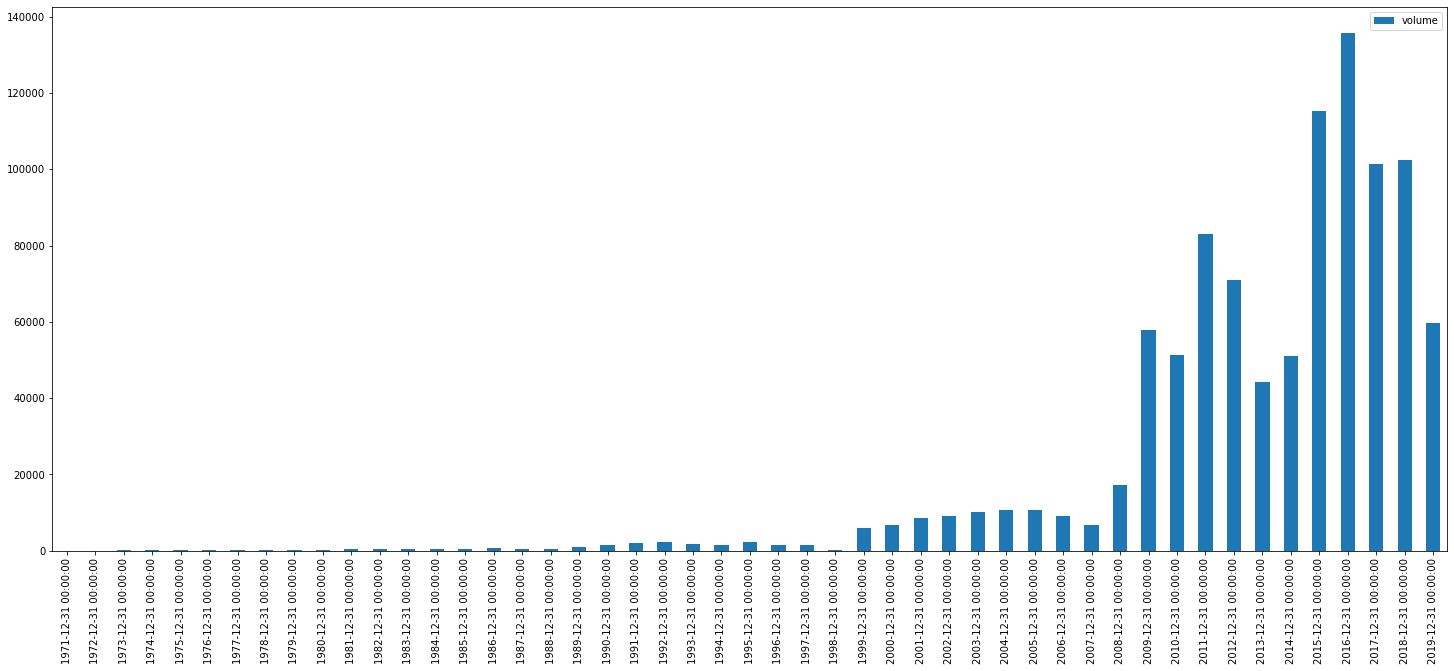

In [ ]:
eu.resample('Y').mean().plot.bar(y=['volume'], figsize=[25,10])

<AxesSubplot:>

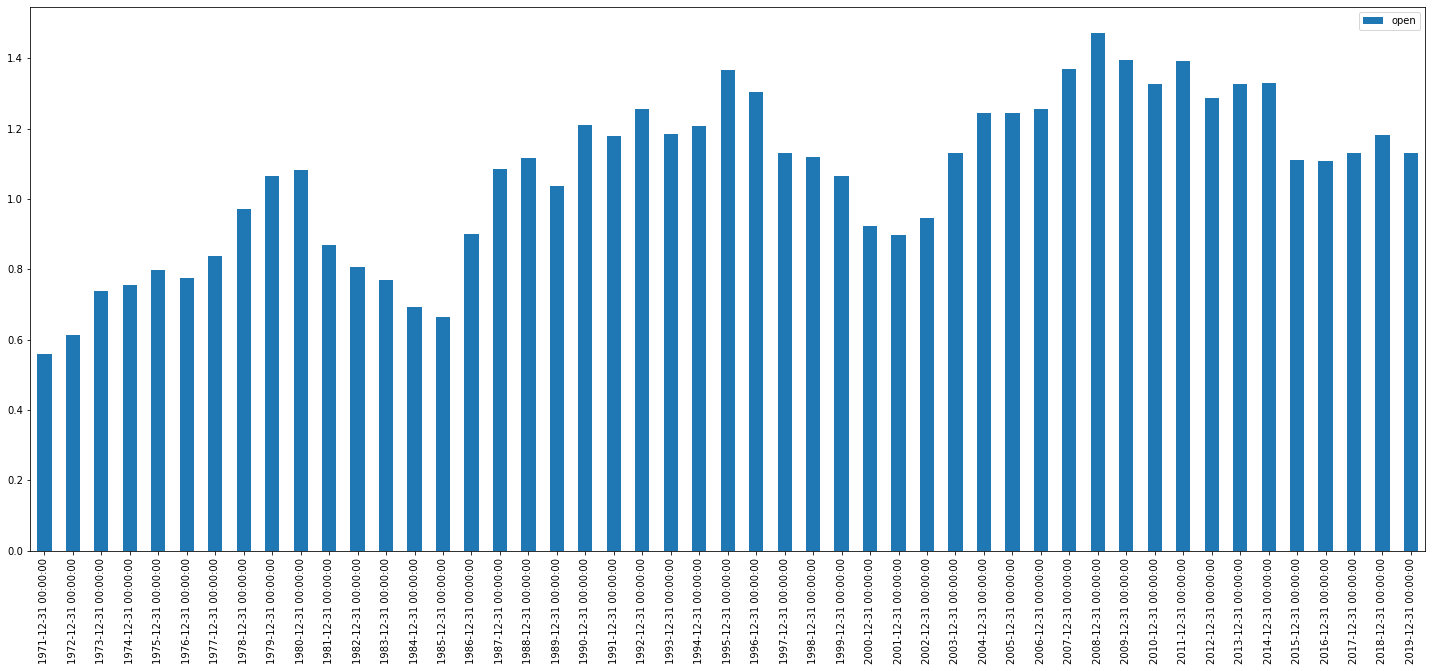

In [ ]:
eu.resample('Y').mean().plot.bar(y=['open'], figsize=[25,10])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

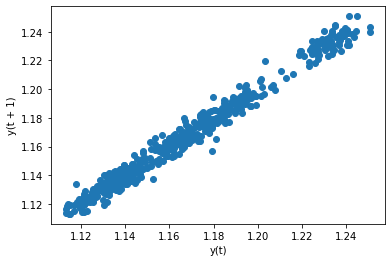

In [18]:
from pandas.plotting import lag_plot

lag_plot(eu['open'].tail(500))

<AxesSubplot:>

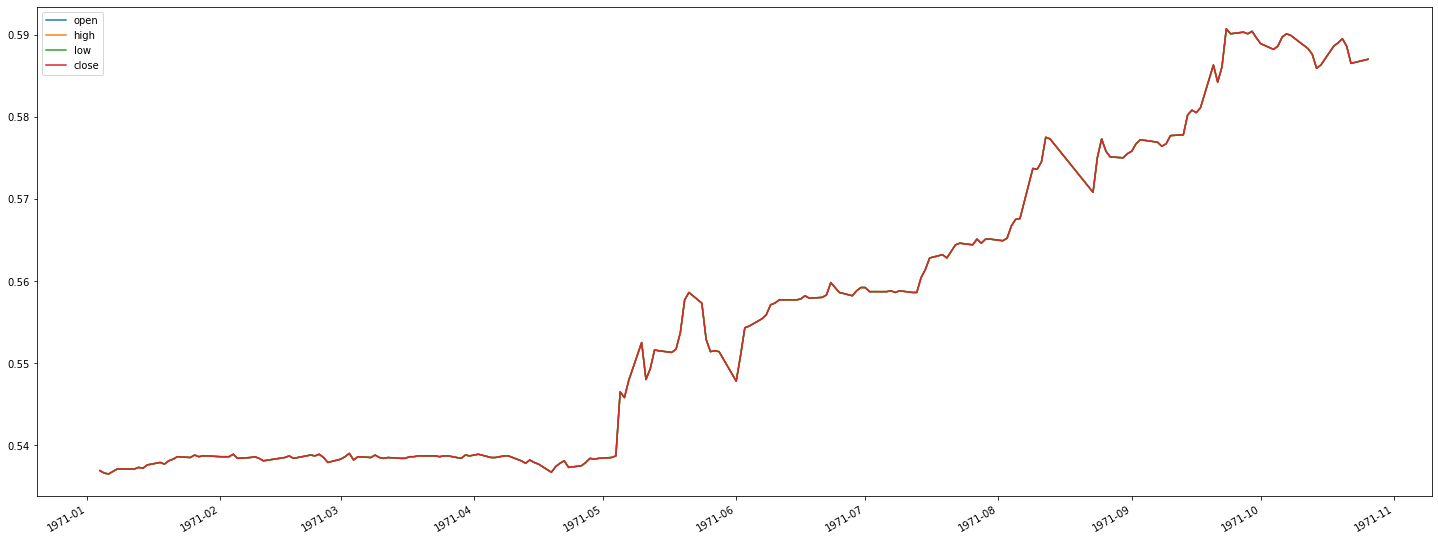

In [ ]:
eu.iloc[:200].plot(y=['open', 'high', 'low', 'close'], figsize=(25,10))

In [ ]:
eu['Moving Average 50 Days'] = eu.open.rolling(window=50).mean()

In [ ]:
data = eu[['open', 'Moving Average 50 Days']][-365:]

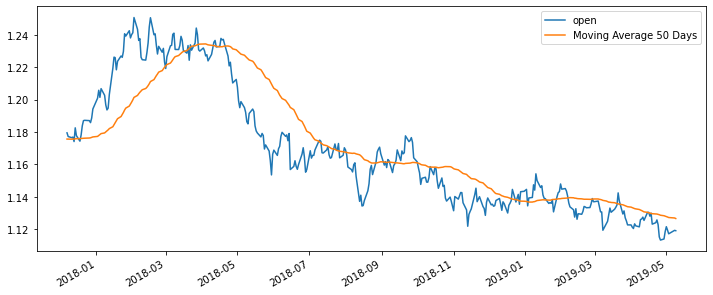

In [ ]:
plots = data.plot(subplots=False,figsize=(12, 5))
plt.show()

In [ ]:
eu['Moving Average 100 Days'] = eu.close.rolling(window=100).mean()


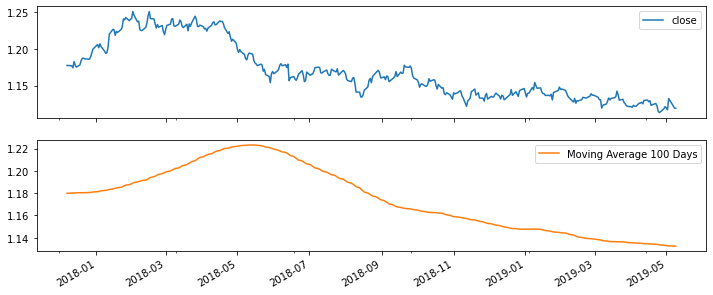

In [ ]:
data = eu[['close', 'Moving Average 100 Days']][-365:]
plots = data.plot(subplots=True,figsize=(12, 5))
plt.show()